In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import nltk

In [3]:
test=pd.read_csv("../input/test.csv")
train=pd.read_csv("../input/train.csv")
sample=pd.read_csv("../input/sample.csv")

In [4]:
train.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [5]:
train.shape

(5279, 4)

In [6]:
sample.head()

,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,0
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,0
2,50b6d851bcff4f35afe354937949e9948975adf7,0
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,0
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,0


In [7]:
train.dtypes

unique_hash    object
text           object
drug           object
sentiment       int64
dtype: object

In [8]:
train['drug'].unique()

array(['gilenya', 'fingolimod', 'ocrevus', 'cladribine', 'humira',
       'tagrisso', 'lucentis', 'pan-retinal photocoagulation', 'remicade',
       'stelara', 'ocrelizumab', 'dexamethasone', 'pemetrexed', 'cimzia',
       'tarceva', 'nivolumab', 'tecentriq', 'ipilimumab', 'mekinist',
       'opdivo', 'dexamethasone implant', 'eylea', 'erlotinib',
       'alectinib', 'entyvio', 'crizotinib', 'keytruda', 'mavenclad',
       'osimertinib', 'vedolizumab', 'atezolizumab', 'durvalumab',
       'alimta', 'tysabri', 'avastin', 'golimumab', 'tofacitinib',
       'ixifi', 'teriflunomide', 'ranibizumab', 'afatinib',
       'upadacitinib', 'zykadia', 'ustekinumab', 'xalkori',
       'pembrolizumab', 'lemtrada', 'siponimod', 'simponi', 'inflectra',
       'entrectinib', 'yervoy', 'vitrectomy', 'bevacizumab', 'gefitinib',
       'amjevita', 'lorlatinib', 'pemrolizumab', 'tafinlar',
       'infliximab-dyyb', 'ozurdex', 'gilotrif', 'imfinzi', 'iressa',
       'laser photocoagulation', 'renflexis', 'a

In [9]:
pd.options.display.max_colwidth

50

In [10]:
pd.set_option('max_colwidth', 3000)

In [11]:
train.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,"Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think about it, it won’t change anything but waste your time and energy. I’m taking Tysabri and feel amazing, no symptoms (other than dodgy color vision, but I’ve had it since always, so, don’t know) and I don’t know if it will last a month, a year, a decade, ive just decided to enjoy the ride, no point in worrying.",gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,"I can completely understand why you’d want to try it. But, results reported in lectures don’t always stand up to the scrutiny of peer-review during publication. There so much still to do before this is convincing. I hope that it does work out, I really do. And if you’re aware of and happy with the risks, then that’s great. I just think it’s important to present this in a balanced way, and to understand why we don’t move straight from the first show of promise in an animal study to using drugs on humans. There’s still a lot of animal data to gather, and human data to gather before anyone can tell if it’s safe or effective. I can’t tell you how many times animal studies don’t follow through to humans, but it’s one of the major attrition points in drug development. You’ve been through some of the unpredictability issues with Cladribine/Gilenya, where there was an interaction that wasn’t predicted. But once people try it, the doctors can see patterns and work out what’s going on. Clemastine/metformin is very exciting, and given what you’ve said about your current condition and your personal risk tolerance it makes sense to try it. It definitely wouldn’t be for everyone.",gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,"Interesting that it only targets S1P-1/5 receptors rather than 1-5 like Fingolimod. Hoping to soon see what the AEs and SAEs were Yes. I'm not sure what this means, exactly: Quote Nine patients reported serious adverse events (2 mg: 3/29 [10.3%], 1.25 mg: 1/43 [2.3%], 0.5 mg: 4/29 [13.8%], and 0.25 mg: 1/50 [2.0%]; no serious adverse event was reported for more than 1 patient and no new safety signals occurred compared with the BOLD Study. If there were 9 patients reporting SAEs, how can it be stated that ""no serious adverse event was reported for more than 1 patient...""? Maybe I haven't read this right, or maybe there's a misprint. I'm very pleased that something is being developed for SPMS, and it's encouraging that siponimod doesn't linger for very long in the body.",fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder where lemtrada and ocrevus sales would go, if they prove anti-cd20 are induction",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain and Cervical Cord are in and my next Neurologist appointment is in the next couple of weeks. There’re no new lesions in Brain/Cord and I’ve had no relapses while I was on Gilenya. This was a good sign. But there was one line in the cervical cord review that concerned me. It goes : “Lesions at C2-3 and T2 now show hypointensity on the post gadolinium T1 images only. This could represent artifact or early axonal loss.” That was bothersome to read. What are the kind of symptoms from C2-C3 lesion should I be aware of ? Would it result in change of my DMT ? Thanks.",gilenya,1


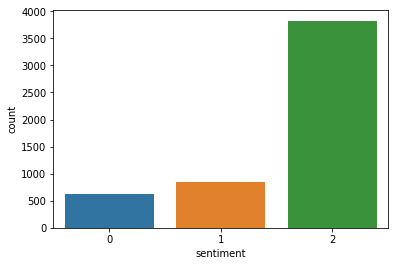

In [12]:
sns.countplot(x='sentiment', data=train)

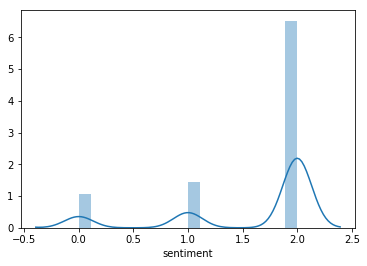

In [13]:
sns.distplot(train['sentiment'])

In [14]:
train.sentiment.value_counts()

2    3825
1     837
0     617
Name: sentiment, dtype: int64

Applying word cloud

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [16]:
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
).generate(str(data))
    fig = plt.figure(1, figsize=(14, 14))
    plt.axis('off')
    if title: 
            fig.suptitle(title, fontsize=20)
            fig.subplots_adjust(top=2.3)

            plt.imshow(wordcloud)
            plt.show()

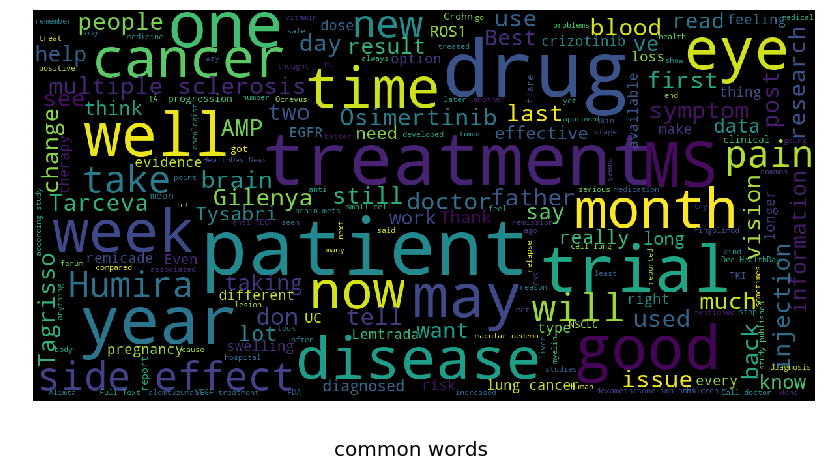

In [17]:
show_wordcloud(train['text'],'common words')

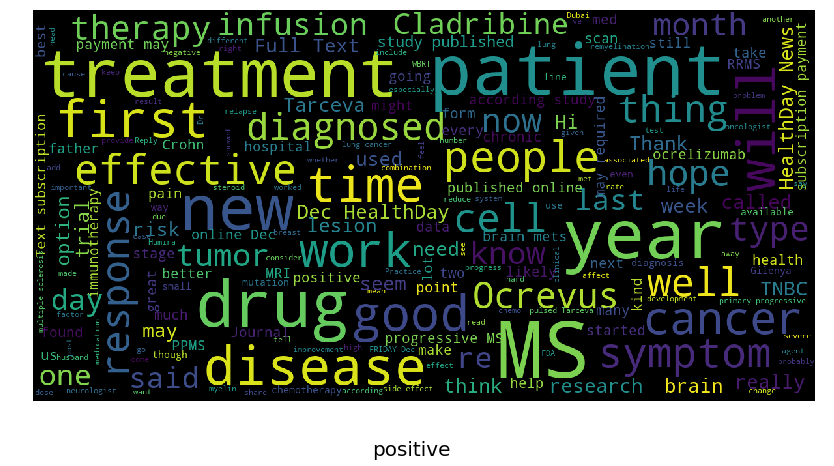

In [18]:
show_wordcloud(train[train['sentiment'] == 0]['text'],'positive')

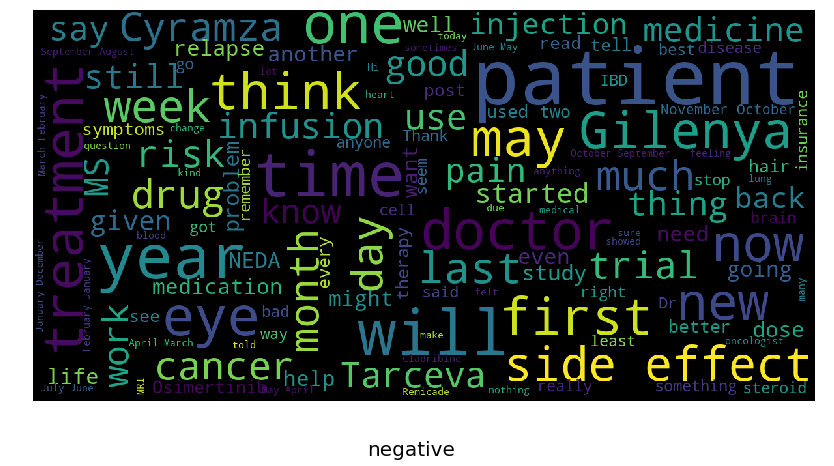

In [19]:
show_wordcloud(train[train['sentiment']==1]['text'] , 'negative')

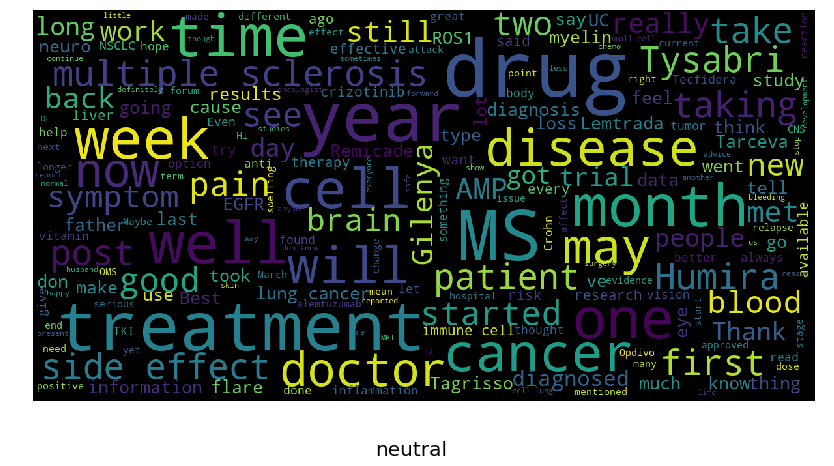

In [20]:
show_wordcloud(train[train['sentiment']==2]['text'],'neutral')

concatinating drugs and text for vectorizing 

In [21]:
train.dtypes

unique_hash    object
text           object
drug           object
sentiment       int64
dtype: object

In [22]:
train.isnull().sum()

unique_hash    0
text           0
drug           0
sentiment      0
dtype: int64

In [23]:
test.isnull().sum()

unique_hash    0
text           0
drug           0
dtype: int64

In [24]:
test.shape==sample.shape

False

In [25]:
test.shape

(2924, 3)

In [26]:
sample.shape

(2924, 2)

In [27]:
del train["unique_hash"]
del train["drug"]

In [28]:
del test["unique_hash"]
del test["drug"]

In [29]:
train.head()

,text,sentiment
0,"Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think about it, it won’t change anything but waste your time and energy. I’m taking Tysabri and feel amazing, no symptoms (other than dodgy color vision, but I’ve had it since always, so, don’t know) and I don’t know if it will last a month, a year, a decade, ive just decided to enjoy the ride, no point in worrying.",2
1,"I can completely understand why you’d want to try it. But, results reported in lectures don’t always stand up to the scrutiny of peer-review during publication. There so much still to do before this is convincing. I hope that it does work out, I really do. And if you’re aware of and happy with the risks, then that’s great. I just think it’s important to present this in a balanced way, and to understand why we don’t move straight from the first show of promise in an animal study to using drugs on humans. There’s still a lot of animal data to gather, and human data to gather before anyone can tell if it’s safe or effective. I can’t tell you how many times animal studies don’t follow through to humans, but it’s one of the major attrition points in drug development. You’ve been through some of the unpredictability issues with Cladribine/Gilenya, where there was an interaction that wasn’t predicted. But once people try it, the doctors can see patterns and work out what’s going on. Clemastine/metformin is very exciting, and given what you’ve said about your current condition and your personal risk tolerance it makes sense to try it. It definitely wouldn’t be for everyone.",2
2,"Interesting that it only targets S1P-1/5 receptors rather than 1-5 like Fingolimod. Hoping to soon see what the AEs and SAEs were Yes. I'm not sure what this means, exactly: Quote Nine patients reported serious adverse events (2 mg: 3/29 [10.3%], 1.25 mg: 1/43 [2.3%], 0.5 mg: 4/29 [13.8%], and 0.25 mg: 1/50 [2.0%]; no serious adverse event was reported for more than 1 patient and no new safety signals occurred compared with the BOLD Study. If there were 9 patients reporting SAEs, how can it be stated that ""no serious adverse event was reported for more than 1 patient...""? Maybe I haven't read this right, or maybe there's a misprint. I'm very pleased that something is being developed for SPMS, and it's encouraging that siponimod doesn't linger for very long in the body.",2
3,"Very interesting, grand merci. Now I wonder where lemtrada and ocrevus sales would go, if they prove anti-cd20 are induction",2
4,"Hi everybody, My latest MRI results for Brain and Cervical Cord are in and my next Neurologist appointment is in the next couple of weeks. There’re no new lesions in Brain/Cord and I’ve had no relapses while I was on Gilenya. This was a good sign. But there was one line in the cervical cord review that concerned me. It goes : “Lesions at C2-3 and T2 now show hypointensity on the post gadolinium T1 images only. This could represent artifact or early axonal loss.” That was bothersome to read. What are the kind of symptoms from C2-C3 lesion should I be aware of ? Would it result in change of my DMT ? Thanks.",1


In [30]:
test.head()

,text
0,"256 (previously stable on natalizumab), with 55% switching to fingolimod"
1,On fingolimod and have been since December 2015; the only way I can describe it any better is like feeling drunk but without having had a drink!!!
2,"Apparently it's shingles! :-/ I do have a few red spots just below my left breast which appeared a few days ago. Wasn't sure if they were connected or not, but showed them to the GP and he immediately said shingles. Apparently 'cos I left it a few days it was too late to prescribe me anything for shingles. The GP prescribed me some useless amitryptiline, which I probably won't take because even a low dose makes me unbearably groggy. Still not entirely happy, just 'cos the stomach pain is so bad and I've had a lot of bloating and stuff. No fever as far as I know. Anyone here had any experience with shingles? Seems like I can expect 3-4 more weeks of this ;_; Dx Crohn's in June 2000. (Yay ) Tried: 5-ASAs, azathioprine, 6MP, Remicade, methotrexate, Humira, diets. 1st surgery 20/2/13 - subtotal colectomy with end ileostomy. 2nd surgery 10/7/15 - ileorectal anastomosis. Stoma reversed and ileum connected to the rectum. Current status: Chronic flare. Do I have any other kind? Current meds: 50mg 6MP; Entyvio (started 3/11/16)"
3,"If the Docetaxel doing once a week x3 weeks then 1 week off (claim to be less harsh), will it have the same efficacy as the once every 3 weeks? Diagnosed in 2014 stage 4 nsclc. EGFR+ (also positive for t790m). 1 year on Tarceva, then 8 months on Rociletinib, then WBR following by 7 months on Tarcrva pulse/carboplatin/avastin/alimta, then 7 month on Tagrisso. Was diagnosed leptomeningeal metastasis Nov 2015. Now has 10cm big tumor and multiple nodules with different sizes. Most recent guardant test (Feb 2017): TP53 C277F 29.8Â EGFR Exon 19 Deletion 20.1Â EGFR AMP ++Â MET H1112Y 0.1Â MET AMP +Â FGFR1 AMP ++Â PIK3CA AMP +Â CCNE1 AMP ++Â BRAF AMP +Â MYC AMP ++Â Additional AlterationsÂ BRCA1 R7C 0.3Â MTOR K1197E 0.2Â NF1 V1762V 0.2Â MET E436K 0.1Â JAK2 V617F NDÂ MAP2K2 E66K ND. Dec 2017 liver biopsy reports my egfr non small cell lung cancer got mutated and changed to small cell lung cancer."
4,"CC, Stelara worked in a matter of days for me. If your GI is willing to jump through hoops to get it for you then it’s probably worth considering. If one anti tnf stopped working for you then another... 2/9/2019 4:42 PM Ulcerative Colitis Next surgery scheduled I had such problems with my skin and my loop until I added them to my setup.... 2/8/2019 8:14 PM Ulcerative Colitis Next surgery scheduled I’m not familiar with Hollister but it’s probably these. They go on first (cut a hole for the stoma to go through) and place it directly on the skin. It protects from leaks staying on the skin and... 2/8/2019 6:13 PM Ulcerative Colitis Humira to remicade? There are Cimzia and Simponi that are anti-TNF shots not based upon weight. Xeljanz is also not weight based (not 100% on that). Stelara is weightbased. Remicade is a well studied drug that is... 2/8/2019 7:10 AM Ulcerative Colitis Unexpected Scope Results for my J-pouch Buckeye, I was just thinking about you. How did you appointment with the GI go? I know that your issues are more complex than mine. I didn’t see you post anything about it.... 2/7/2019 9:10 AM Ulcerative Colitis Next surgery scheduled Congratulations. I'd recommend getting a convex wafer for your new ostomy, it will really help with your liquid output. As you probably know, the loop ileo's can be at times a little more... 2/6/2019 6:43 PM Ulcerative Colitis After Remicade infusion..... I’d get tested for Remicade antibodies. I had those same symptoms when I had serum sickness. Don’t ignore it. Mine got worse were I started dropping things, memory loss, bone and joint pain. If it is... 2/6/2019 12:46 PM Ulcerative Colitis The Super-Donor Phenomenon in Fecal Microbiota Transplantation Here is a segment that the CBC Radio did on it with their Quirks & Quarks show https://www.cbc.ca/r


Merging drug and revew text

Modelling

In [31]:
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer



In [32]:
tokenizer = TweetTokenizer()

In [33]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), tokenizer=tokenizer.tokenize)
full_text = list(train['text'].values) + list(test['text'].values)
vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(train['text'])
test_vectorized = vectorizer.transform(test['text'])

In [34]:
y = train['sentiment']

In [35]:
train.head()

,text,sentiment
0,"Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think about it, it won’t change anything but waste your time and energy. I’m taking Tysabri and feel amazing, no symptoms (other than dodgy color vision, but I’ve had it since always, so, don’t know) and I don’t know if it will last a month, a year, a decade, ive just decided to enjoy the ride, no point in worrying.",2
1,"I can completely understand why you’d want to try it. But, results reported in lectures don’t always stand up to the scrutiny of peer-review during publication. There so much still to do before this is convincing. I hope that it does work out, I really do. And if you’re aware of and happy with the risks, then that’s great. I just think it’s important to present this in a balanced way, and to understand why we don’t move straight from the first show of promise in an animal study to using drugs on humans. There’s still a lot of animal data to gather, and human data to gather before anyone can tell if it’s safe or effective. I can’t tell you how many times animal studies don’t follow through to humans, but it’s one of the major attrition points in drug development. You’ve been through some of the unpredictability issues with Cladribine/Gilenya, where there was an interaction that wasn’t predicted. But once people try it, the doctors can see patterns and work out what’s going on. Clemastine/metformin is very exciting, and given what you’ve said about your current condition and your personal risk tolerance it makes sense to try it. It definitely wouldn’t be for everyone.",2
2,"Interesting that it only targets S1P-1/5 receptors rather than 1-5 like Fingolimod. Hoping to soon see what the AEs and SAEs were Yes. I'm not sure what this means, exactly: Quote Nine patients reported serious adverse events (2 mg: 3/29 [10.3%], 1.25 mg: 1/43 [2.3%], 0.5 mg: 4/29 [13.8%], and 0.25 mg: 1/50 [2.0%]; no serious adverse event was reported for more than 1 patient and no new safety signals occurred compared with the BOLD Study. If there were 9 patients reporting SAEs, how can it be stated that ""no serious adverse event was reported for more than 1 patient...""? Maybe I haven't read this right, or maybe there's a misprint. I'm very pleased that something is being developed for SPMS, and it's encouraging that siponimod doesn't linger for very long in the body.",2
3,"Very interesting, grand merci. Now I wonder where lemtrada and ocrevus sales would go, if they prove anti-cd20 are induction",2
4,"Hi everybody, My latest MRI results for Brain and Cervical Cord are in and my next Neurologist appointment is in the next couple of weeks. There’re no new lesions in Brain/Cord and I’ve had no relapses while I was on Gilenya. This was a good sign. But there was one line in the cervical cord review that concerned me. It goes : “Lesions at C2-3 and T2 now show hypointensity on the post gadolinium T1 images only. This could represent artifact or early axonal loss.” That was bothersome to read. What are the kind of symptoms from C2-C3 lesion should I be aware of ? Would it result in change of my DMT ? Thanks.",1


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
logreg = LogisticRegression()
ovr = OneVsRestClassifier(logreg)

In [37]:
%%time
ovr.fit(train_vectorized, y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 14 s, sys: 192 ms, total: 14.2 s
Wall time: 10.8 s


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
scores = cross_val_score(ovr, train_vectorized, y, scoring='accuracy', n_jobs=-1, cv=3)

In [40]:
scores

array([0.72443182, 0.72443182, 0.72484366])

In [41]:
predictions = ovr.predict(test_vectorized)
sample['sentiment'] = predictions

In [42]:
predictions

array([2, 2, 2, ..., 2, 2, 2])

In [43]:
sample.head()

,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,2
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


In [44]:
sample['sentiment'].unique()

array([2])

In [45]:
sample.to_csv("drugs_output.csv",index=False)